In [2]:
import zipfile
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import glob
from os.path import basename

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

#unzip images.zip file into images/
with zipfile.ZipFile("readonly/images.zip","r") as zip_ref:
    zip_ref.extractall("images/")


In [3]:
#ask user input search string
search = input("Search for this string: ")

Search for this string: Mark


In [9]:
#search for string in every file
pngs = glob.glob("images/*.png")
dict = {}
for png in pngs:
    text = pytesseract.image_to_string(png)
    #if results are founded, search for faces in the .png file
    if search in text:
        ##...search for faces into file
        
        cv_img = cv.imread(png)
        faces = face_cascade.detectMultiScale(cv_img,1.3,5)
        dict[png] = faces

print(dict)


{'images\\a-0.png': array([[1967, 1882,  216,  216],
       [3138, 1733,  281,  281],
       [2544, 1955,  203,  203],
       [1152, 2001,  209,  209],
       [1665, 2017,  224,  224],
       [2653, 3055,  301,  301]], dtype=int32)}


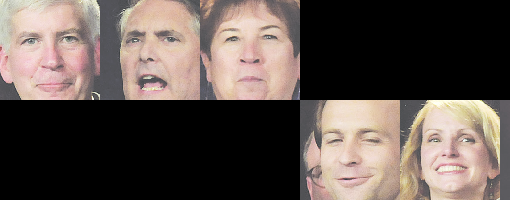

In [30]:
def show_rects(faces, png):
    #Lets read in our gif and convert it
    pil_img=Image.open(png).convert("RGB")
    bi=Image.new('RGBA', (510, (int((len(faces)/5)+1)*100)), 'black')
    # Set our drawing context
    drawing=ImageDraw.Draw(pil_img)
    # And crop all of the rectangles in faces
    text = "Results found in file "+basename(png)
    con = 0
    if len(faces) > 0:
        for x,y,w,h in faces:
            img = pil_img.crop((x,y,x+w,y+h))
            #display(img.resize((100, 100)))
            alt = 0
            lar = 0
            if con > 2:
                alt = 100
                lar = 0
                bi.paste(img.resize((100, 100)), ((lar+1)*con*100,alt))
            bi.paste(img.resize((100, 100)), ((lar+1)*con*100,alt))
            con += 1
    else:
        text = "But there were no faces in that file!"
    display(bi)
for i in dict:
    show_rects(dict[i], i)
    #print(bi)


In [14]:
cv_img = cv.imread('images/a-1.png')
faces = face_cascade.detectMultiScale(cv_img,1.3,5)
faces

array([[ 833, 2382,  212,  212],
       [2235, 2448,   51,   51],
       [2515, 2419,   61,   61],
       [2063, 2499,   51,   51],
       [ 492, 1366,  126,  126]], dtype=int32)